### 국내, 국외 코로나 백신 현황과 GDP의 상관관계를 파악하고자 함

In [128]:
import pandas as pd
import folium
import json
import numpy as np
from selenium import webdriver
from bs4 import BeautifulSoup
# import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# from matplotlib import font_manager, rc
import platform
import warnings

# 국내 백신 접종 현황

In [132]:
sKoreaviccineData=pd.read_excel('sKorea_vaccined.xlsx', thousands=',')

In [133]:
sKoreaviccineData

,구분,위도,경도,누적합계
0,서울,37.530334,126.979217,3519568
1,부산,35.160301,129.046013,1302530
2,대구,35.825520,128.577804,812726
3,인천,37.452734,126.695070,986146
4,광주,35.141265,126.831830,521619
5,대전,36.331327,127.396008,502971
6,울산,35.527689,129.296607,377491
7,세종,36.571867,127.280291,102734
8,경기,37.408857,127.114676,4433216
9,강원,37.755049,128.293353,648771


In [134]:
vaccineMap=folium.Map([36.57,127.98],zoom_start=7,tiles='Stamen Terrain')

In [135]:
for i in sKoreaviccineData.index:
    city=sKoreaviccineData.loc[i,'구분']
    lat=sKoreaviccineData.loc[i,'위도']
    lng=sKoreaviccineData.loc[i,'경도']
    vaccine=sKoreaviccineData.loc[i,'누적합계']
    folium.CircleMarker(
        location=[lat,lng],
        fill=True,
        color="yellow",
        fill_color='skyblue',
        fill_opacity=0.6,
        weight=1,
        dashArray='30',
        radius=float(vaccine)/80000,
        tooltip=city+"\n"+str(vaccine)+"명"
    
    ).add_to(vaccineMap)
    

## 국내 백신 접종 현황 지도

In [136]:
vaccineMap

## 국내 지역별 1인당 총생산량

<AxesSubplot:xlabel='1인당 지역내총생산', ylabel='시도별'>

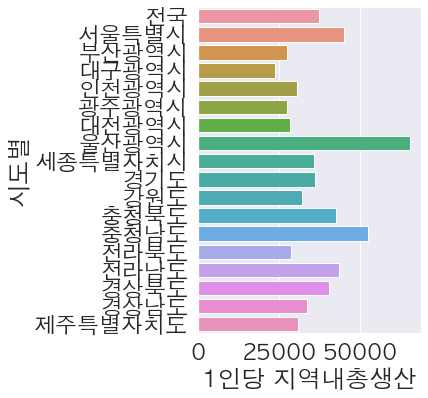

In [137]:
sKoreaGdp=pd.read_excel('./시도별_1인당_지역내총생산__지역총소득__개인소득_20210802005930.xlsx',header=1)
sKoreaGdp
plt.figure(figsize=(4,6))
sns.barplot(x='1인당 지역내총생산',y='시도별',data=sKoreaGdp)

국내 백신접종 현황 출처
https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000 <br>
시도별 1인당 지역내 총생산, 지역총소득, 개인소득 출처
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1C86&conn_path=I2

> 국내 백신 접종 수와 지역내 1인당총생산량이 비례하지 않다는 것을 알 수 있다.

# 전세계 백신 접종 현황

In [138]:
driver=webdriver.Chrome('../../../../CODINGPROGRAM/chromedriver')
url='https://news.google.com/covid19/map?hl=en-US&gl=US&ceid=US%3Aen&state=4'
driver.get(url)

In [139]:
location=driver.find_elements_by_css_selector("#yDmH0d > c-wiz > div > div.FVeGwb.ARbOBb > div.BP0hze > div.y3767c > div > div > div.dzRe8d.pym81b > div > div.sOh.CrmLxe > table > tbody > tr > th > div > div.pcAJd")
vaccined=driver.find_elements_by_css_selector("#yDmH0d > c-wiz > div > div.FVeGwb.ARbOBb > div.BP0hze > div.y3767c > div > div > div.dzRe8d.pym81b > div > div.sOh.CrmLxe > table > tbody > tr > td")
loc=[]
vac=[]
total=[]
for i in range(1,25):
    loc=location[i].text
    vac=vaccined[i*5].text
    total.append([loc,vac])
df=pd.DataFrame(total, columns=['location','vaccined'])
df.to_excel('data.xlsx', index=False)

In [140]:
data=pd.read_excel('data.xlsx', thousands=',')

In [141]:
if platform.system()=="Darwin":
    rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus']=False

warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='vaccined', ylabel='location'>

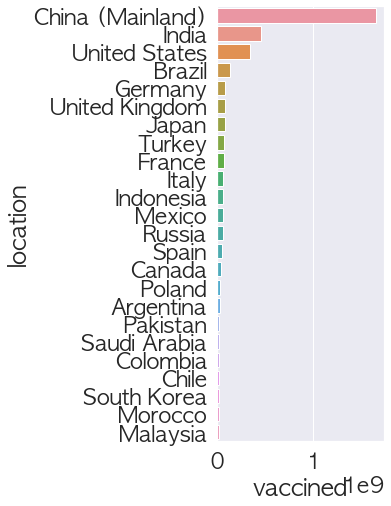

In [142]:
plt.figure(figsize=(3,8))
sns.barplot(x='vaccined',y='location',data=data)

## 각 나라의 2020년 1인당 총생산량 

In [143]:
# 각 나라의 GDP 순위
gdpfile=pd.read_csv('./WEO_Data.csv',thousands=',').head(25)
gdp=gdpfile.dropna()

<AxesSubplot:xlabel='2021', ylabel='Country'>

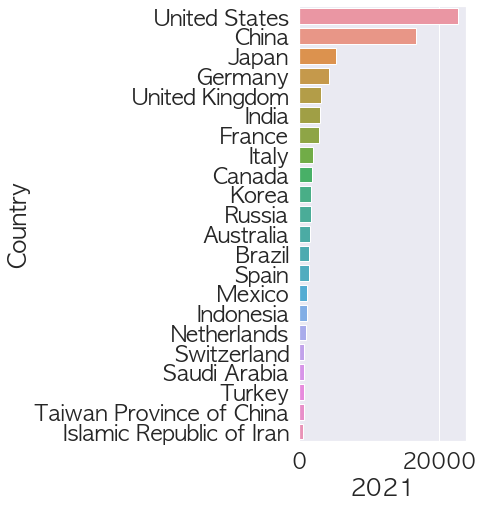

In [144]:
plt.figure(figsize=(3,8))
sns.barplot(x='2021',y='Country',data=gdp)

In [164]:
totalC10=[]
for i in gdpfile['Country'][:10]:
    totalC10.append(i)
for j in data['location'][:10]:
    totalC10.append(j)
totalCset10=set(totalC10)
print("상위 10위 안에드는 10개의 나라를 비교하면 : ",len(totalC10)-len(totalCset10),"개의 나라가 겹치고")

상위 10위 안에드는 10개의 나라를 비교하면 :  6 개의 나라가 겹치고


In [165]:
totalC25=[]
for i in gdpfile['Country'][10:]:
    totalC25.append(i)
for j in data['location'][10:]:
    totalC25.append(j)
totalCset25=set(totalC25)
print("상위 10위 밑의 15개의 나라를 비교하면 : ",len(totalC25)-len(totalCset25),"개의 나라가 겹친다.")

상위 10위 밑의 15개의 나라를 비교하면 :  6 개의 나라가 겹친다.


> 상위 10위안에드는 나라가 백신접종 순위가 더 높을 확률이 크다는 것을 알 수 있다.

전세계 코로나 백신 관련 출처 https://news.google.com/covid19/map?hl=ko&state=7&gl=KR&ceid=KR%3Ako
전세계 GDP 정보 출처 https://www.imf.org/en/Publications/WEO/weo-database/2021/April/weo-report?c=512,914,612,614,311,213,911,314,193,122,912,313,419,513,316,913,124,339,638,514,218,963,616,223,516,918,748,618,624,522,622,156,626,628,228,924,233,632,636,634,238,662,960,423,935,128,611,321,243,248,469,253,642,643,939,734,644,819,172,132,646,648,915,134,652,174,328,258,656,654,336,263,268,532,944,176,534,536,429,433,178,436,136,343,158,439,916,664,826,542,967,443,917,544,941,446,666,668,672,946,137,546,674,676,548,556,678,181,867,682,684,273,868,921,948,943,686,688,518,728,836,558,138,196,278,692,694,962,142,449,564,565,283,853,288,293,566,964,182,359,453,968,922,714,862,135,716,456,722,942,718,724,576,936,961,813,726,199,733,184,524,361,362,364,732,366,144,146,463,528,923,738,578,537,742,866,369,744,186,925,869,746,926,466,112,111,298,927,846,299,582,487,474,754,698,&s=NGDPD,&sy=2021&ey=2021&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1